##### File:                         NYCwifi.ipynb
##### Author:                   Ryan Leone
##### Last Modified:       9/7/18
##### Purpose:               read in a .csv file and manipulate the data to draw conclusions from it 
<hr />

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [18]:
wifi = pd.read_csv('NYC_Free_Public_WiFi_03292017.csv')  #read in the dataset using a DataFrame
#delete useless or redundant columns
del wifi['OBJECTID']
del wifi['the_geom']
del wifi['TYPE']
del wifi['BORO']
del wifi['REMARKS']
del wifi['CITY']
del wifi['SOURCEID']
del wifi['NAME']
del wifi['BOROCODE']
del wifi['COUNDIST']
del wifi['BOROCD']
del wifi['CT2010']
del wifi['BOROCT2010']
del wifi['BIN']
del wifi['BBL']
del wifi['DOITT_ID']
del wifi['LAT']
del wifi['LON']
del wifi['X']
del wifi['Y']
del wifi['NTACODE']
del wifi['NTANAME']
del wifi['POSTCODE']

## New York City free WiFi hotspot locations as of March 29th, 2017, taken from [Data.gov](https://catalog.data.gov/dataset/nyc-wi-fi-hotspot-locations-9a8e0)

<hr />
### Reference Material
## NYC - Boro Sizes by Area 
### via [Wikipedia](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City)
##### 1. Queens          - 178 mi^2 
##### 2. Staten Island - 102.5 mi^2 (smallest population-wise)
##### 3. Brooklyn        - 96.99 mi^2
##### 4. The Bronx      - 56.99 mi^2
##### 5. Manhattan      - 22.82 mi^2 (smallest geographically)
<hr />

# Hypotheses
### Hypothesis I: based on the sizes of each boro of New York City (geographically and population-wise), the largest number of WiFi hotspots will be inside the boro of Queens, followed by Brooklyn.
### Hypothesis II: the total number of "Outdoor" hotspots will be greater than all other categories, and the majority of the outdoor hotspots will be free "kiosk" type hotspots.
##### * Hypothesis II is based on my latest visit to NYC over Thanksgiving break, when I encountered many LinkNYC kiosks on multiple blocks, compared to my visit to a similar area about a year earlier when I saw just two or three such kiosks.

<hr />
# Hypothesis I
#### Use of various chart types to show the total occurances of each unique value in the BORONAME column.

In [19]:
df2 = wifi['BORONAME'] #dataframe for boro column
df2.describe()

count          2566
unique            5
top       Manhattan
freq           1205
Name: BORONAME, dtype: object

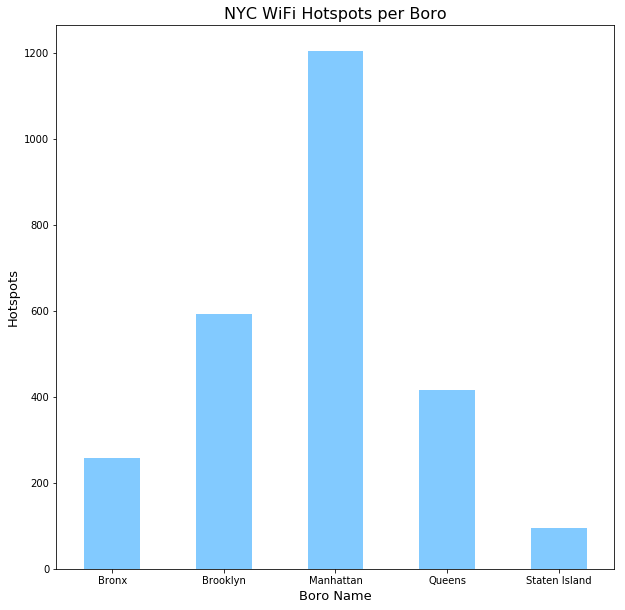

In [20]:
df2 = wifi.groupby('BORONAME')['BORONAME'].count()
# rot taken from https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-pandas-barplot
ax = df2.plot.bar(figsize=[10,10], color=['#82CAFF'], rot=0) # rot the x-axis labels
ax.set_xlabel("Boro Name", fontsize=13) #change fontsize to differentiate from xticks
ax.set_ylabel('Hotspots', fontsize=13)
ax.set_title('NYC WiFi Hotspots per Boro', fontsize=16)

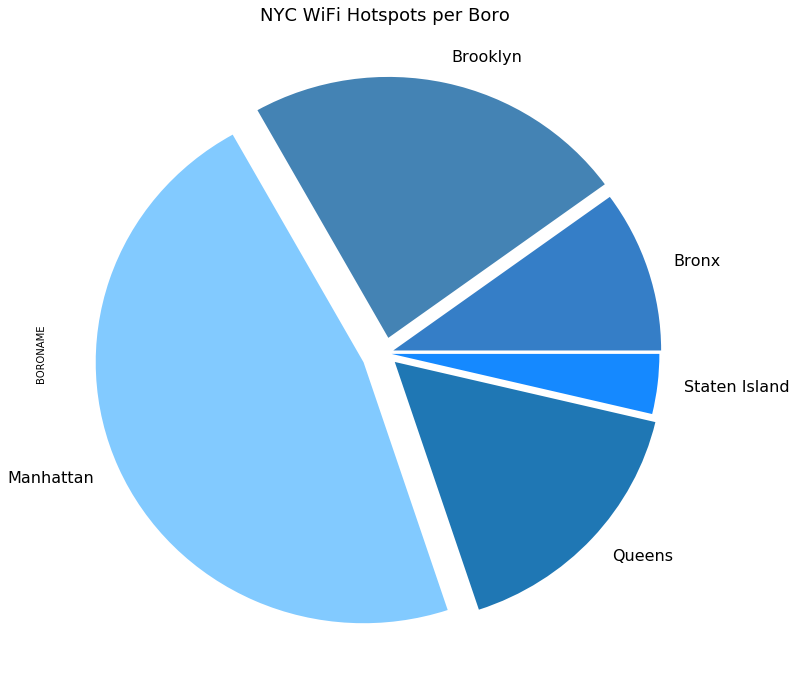

In [21]:
df2 = wifi.groupby('BORONAME')['BORONAME'].count()
#order - Bronx, Brooklyn, Manhattan, Queens, Staten Island (alphabetical)
# explode taken from https://stackoverflow.com/questions/35488666/matplotlib-pandas-pie-chart-label-mistakes
explode = (0.033, 0.06, 0.087, 0.05, 0.025)
ax2 = df2.plot.pie(figsize=[12,12], colors=['#357EC7', '#4483B4', '#82CAFF', '#1F77B4', '#1589FF'], explode=explode, fontsize=16)
ax2.set_title('NYC WiFi Hotspots per Boro', fontsize=18)

In [22]:
#taken from https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb
print("Percentage of Total Hotspots")
print("1: Manhattan    : %.2f%%" % (1205 / 2566 * 100))
print("2: Brooklyn     : %.2f%%" % (593 / 2566 * 100))
print("3: Queens       : %.2f%%" % (416 / 2566 * 100))
print("4: Bronx        : %.2f%%" % (257 / 2566 * 100))
print("5: Staten Island: %.2f%%" % (95 / 2566 * 100))

Percentage of Total Hotspots
1: Manhattan    : 46.96%
2: Brooklyn     : 23.11%
3: Queens       : 16.21%
4: Bronx        : 10.02%
5: Staten Island: 3.70%


Although unrelated, a coincidental trend has the number of characters in each of the boro names (with the exception of Staten Island) correlating with the percentage of total hotspots in descending order, as indicated below.

In [23]:
print("Length of Boro Name Strings")
print ("1: Staten Island: %s" % (len('Staten Island')))
print ("2: Manhattan    : %s" % (len('Manhattan')))
print ("3: Brooklyn     : %s" % (len('Brooklyn')))
print ("4: Queens       : %s" % (len('Queens')))
print ("5: Bronx        : %s" % (len('Bronx')))

Length of Boro Name Strings
1: Staten Island: 13
2: Manhattan    : 9
3: Brooklyn     : 8
4: Queens       : 6
5: Bronx        : 5


#### Upon analysis of the df2 dataframe, Manhattan appeared as the top value for number of hotspots, with a frequency of 1205 (46.96%, based on the pie chart and the above calculation). This disproves the first part of Hypothesis I (Queens was third, not first), although the second part of my hypothesis was correct (Brooklyn was indeed second). 
#### I found this result surprising considering Manhattan is the smallest boro based on area, though there are probably many other factors involved (such as population, for instance, in which Manhattan ranks third).
#### Another surprising (albeit questionable) finding was the mere 95 "Staten Island" entries of the dataset. While this boro does rank last in population, division of 95 into 2566 comes out to .037, or just under 4 percent of the total, a very low value in comparison to the other boros.
<hr />

# Hypothesis II
#### Comparing the location type values using the data from the "LOCATION_T" column with various plot types

In [24]:
df3 = wifi['LOCATION_T'] #dataframe for location column
df3.describe()

count              2566
unique                6
top       Outdoor Kiosk
freq               1134
Name: LOCATION_T, dtype: object

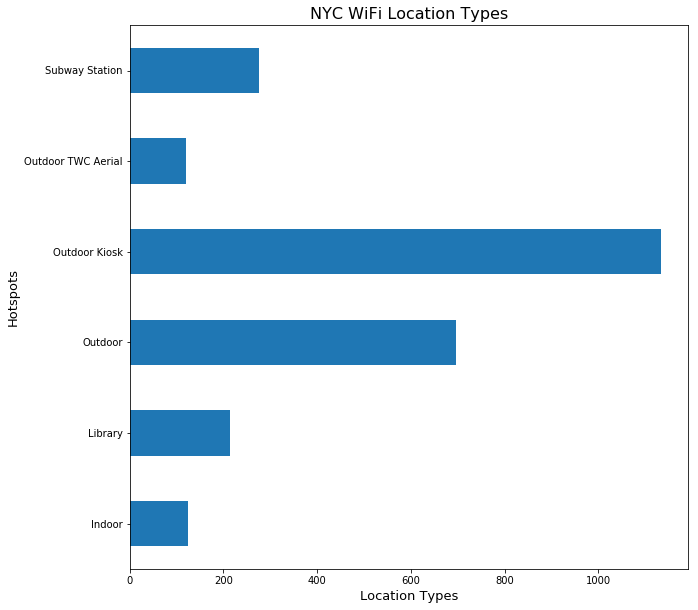

In [25]:
df3 = wifi.groupby('LOCATION_T')['LOCATION_T'].count()
ax3 = df3.plot.barh(figsize=[10,10], color=['#1F77B4'])
ax3.set_xlabel('Location Types', fontsize=13)
ax3.set_ylabel('Hotspots', fontsize=13)
ax3.set_title('NYC WiFi Location Types', fontsize=16)

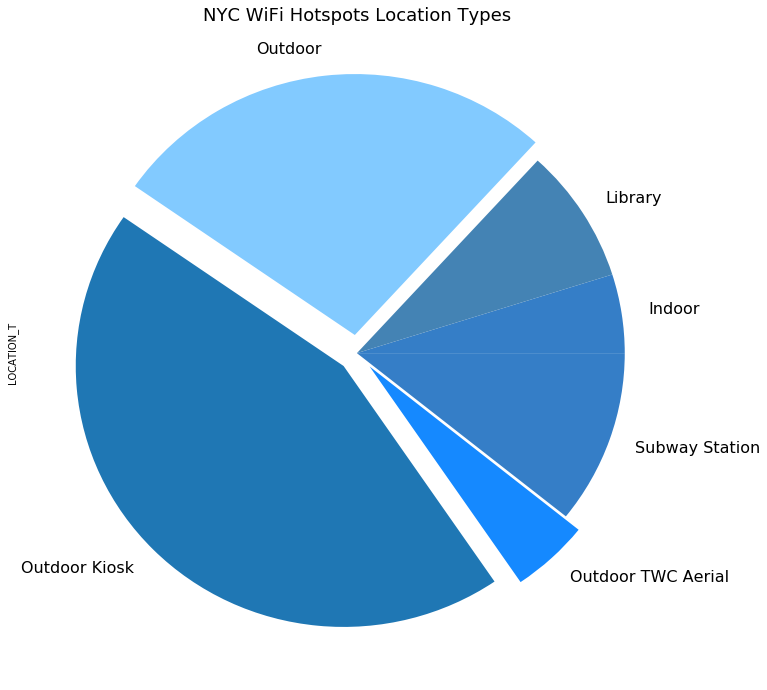

In [26]:
df3 = wifi.groupby('LOCATION_T')['LOCATION_T'].count()
explode = (0, 0, 0.07, 0.07, 0.07, 0)
ax3 = df3.plot.pie(figsize=[12,12], colors=['#357EC7', '#4483B4', '#82CAFF', '#1F77B4', '#1589FF'], explode=explode, fontsize=16)
ax3.set_title('NYC WiFi Hotspots Location Types', fontsize=18)

#### Based on the above horizontal bar and pie charts, the "Outdoor" location types largely outnumber the other options, meaning my second hypothesis was correct. One surprising finding was the amount of "Subway Station" hotspot types. I read a recent article regarding plans to add wifi to all subway stations in NYC, though I didn't expect a value around 300. I do recall there being over 400 subway stations in NYC, so this value seems even more intriguing in comparison.
<hr />

### Analysis of LOCATION_T column values of the dataset using tables

In [27]:
badWifi = wifi['ACTIVATED'] #first dataframe for activated column
badWifi.describe()

count                             2566
unique                             221
top       11/30/1899 12:00:00 AM +0000
freq                              1601
Name: ACTIVATED, dtype: object

Using the describe function, the most frequent value shown in the ACTIVATED column is "11/30/1899 12:00:00 AM +0000". This is obviously incorrect, as WiFi was not around in the late 1800's. Since this test pertains to date values specifically, any rows with this value will be removed to improve accuracy. 

In [28]:
# taken from https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
goodWifi = wifi[wifi.ACTIVATED != "11/30/1899 12:00:00 AM +0000"] #new dataframe for activated column, excluding this date
goodWifi['ACTIVATED'].describe() #ensure the most frequent value has been changed

count                              965
unique                             220
top       07/19/2016 12:00:00 AM +0000
freq                                23
Name: ACTIVATED, dtype: object

<hr />
With all instances of "11/30/1899 12:00:00 AM +0000" removed, analysis of date ranges can commence.

In [29]:
frequentWifi = goodWifi[goodWifi['ACTIVATED'] == '07/19/2016 12:00:00 AM +0000']
frequentWifi.sort_values('BORONAME', ascending=False) #sort by boroname in descending order

,PROVIDER,LOCATION,LOCATION_T,SSID,ACTIVATED,BORONAME
7,LinkNYC - Citybridge,1606 Broadway,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
1483,LinkNYC - Citybridge,1992 BROADWAY,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
2540,LinkNYC - Citybridge,1725 Broadway,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
2539,LinkNYC - Citybridge,1710 Broadway,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
2538,LinkNYC - Citybridge,250 West 57St,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
2271,LinkNYC - Citybridge,1349 3 AVENUE,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
2053,LinkNYC - Citybridge,1293 Broadway,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
1510,LinkNYC - Citybridge,1967 BROADWAY,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
1509,LinkNYC - Citybridge,1967 BROADWAY,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan
1496,LinkNYC - Citybridge,1972 BROADWAY,Outdoor Kiosk,LinkNYC Free Wi-Fi,07/19/2016 12:00:00 AM +0000,Manhattan


For the next cell, the count of rows containing the string "BROADWAY" or "Broadway" in the LOCATION column of a new dataframe is calculated.

In [30]:
BroadwayWifi = frequentWifi[frequentWifi['LOCATION'].str.contains('BROADWAY|Broadway')].count()
BroadwayWifi['PROVIDER'] #any column name is valid

12

The results for the above cell lead to the conclusion that 12 LinkNYC free public WiFi kiosks existed on Broadway in Manhattan at the time of data collection.
<hr />
The below cell will return the LOCATION column of the frequentWifi dataframe with values which contain any of the following strings: "East", "EAST", "WEST", or "West". 

In [31]:
directionWifi = frequentWifi[frequentWifi['LOCATION'].str.contains('East|EAST|WEST|West')]
directionWifi['LOCATION']

588             133 East 14Th St
730           72 EAST 161 STREET
773     56 West Kingsbridge Road
1137         600 WEST 139 STREET
1146         551 WEST 138 STREET
2538               250 West 57St
Name: LOCATION, dtype: object

#### There are a few findings based on analysis of dataframes related to various columns (assuming the correctness of the dataset).

For instance, manipulation of row values with the most frequent date value ("07/19/2016 12:00:00 AM +0000") returns some interesting patterns:
1. The sole provider of hotspots with this activation date is "LinkNYC - Citybridge", and the sole SSID unique value is "LinkNYC Free Wi-Fi".
2. All of the hotspots with this activation date are located in either Manhattan (19) or the Bronx (4).
3. Reiterating cell 135's summary, most of the Manhattan hotspots are located on Broadway (12 out of 19).
4. Six of the hotspots with this activation date are located on streets with either "East" or "West" in their names.
<hr />

#### A table will be constructed using the original 'wifi' dataframe which displays the occurances of the cardinal direction words  in location names. This is based off of the test in cell 132, but with a larger dataset. I believe the amount of values will be much larger in comparison, considering the size of New York City.

In [32]:
directionWifiII = wifi[wifi['LOCATION'].str.contains('East|EAST|WEST|West|NORTH|North|South|SOUTH', na=False)]
directionWifiII['LOCATION'].describe()

count                              340
unique                             328
top       North area off Richmond Terr
freq                                 6
Name: LOCATION, dtype: object

The above describe() function indicates a total of 340 values for location names, with 328 being unique. Upon further analysis, it is apparent that not all the location names are necessarily street names. This may have been true for each entry of the directionWifi LOCATION column, but based on the describe function above, we can see that the character "North" in the most frequent value is not actually part of the street name.   